# Cleaning Data in Python
It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions.

Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. In this course, you will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more!

## Chapter 1: Common data problems

In this chapter, I will learn how to overcome some of the most common dirty data problems: convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

In [1]:
# Import the required packages
import pandas as pd

In [2]:
# Load the data from the Ride Sharing CSV
ride_sharing = pd.read_csv("./data/ride_sharing_new.csv")

In [3]:
# Take a look at the first few rows
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [4]:
# Take a look at the info of this dataframe
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


We can see some data type issues here. The `duration` column type is `object`, which is how `pandas` stores strings, also the `user_gender` column is stored as `object`, while it should be `category` to facilitate analysis. 

Also, the column `user_type` is `int`, while it should be `category`.
The `user_type`` column contains information on whether a user is taking a free ride and takes on the following values:
- 1 for free riders.
- 2 for pay per ride.
- 3 for monthly subscribers.

In [5]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


We can see that `pandas` treats the datapoints numerically, as amounts rather than categories. We can't work with that.

The `user_type` column has a finite set of possible values that represent groupings of data, so it should be converted to `category`.

In [6]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype("category")

In [7]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

### Exercise (Data Type Constraints): Summing strings and concatenating numbers
In this exercise, you'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip `"minutes"` from the column in order to make sure `pandas` reads it as numerical.

In [8]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2


In [9]:
"11 minutes".strip(" minutes")

'11'

In [10]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype("int")

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print("The average ride duration is", ride_sharing["duration_time"].mean(), "minutes.")

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
The average ride duration is 11.389052795031056 minutes.


### Exercise (Data Range Constraints): Tire size constraints
In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the `tire_sizes` column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a `categorical` value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an `integer`, then setting and testing the new upper limit of 27″ for tire sizes.

In [11]:
# Simulating the exercise dataframe by adding the 'tire_sizes' column with the specified values
# but with some outliers above 27
import random

ride_sharing["tire_sizes"] = [random.randint(26,31) for _ in range(25760)]
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("category")
ride_sharing["tire_sizes"].value_counts()

tire_sizes
27    4360
30    4343
28    4330
29    4326
26    4231
31    4170
Name: count, dtype: int64

In [12]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      21529
Name: tire_sizes, dtype: int64


### Exercise (Data 'Date' Range Constraints): Back to the future
A new update to the data pipeline feeding into the `ride_sharing` DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type object, which represents strings in `pandas`.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the `ride_date` column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

In [13]:
# Simulating the exercise dataframe by adding the 'ride_date' column with the specified values
# but with some outlier dates (in the future)
from datetime import datetime, timedelta
import random

# Function to generate a random date within a specified range
def random_date(start_date, end_date):
    time_delta = end_date - start_date
    random_days = random.randint(0, time_delta.days)
    random_date = start_date + timedelta(days=random_days)
    return random_date

# Define the range of dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 12, 31)

# Create the required column to simulate the exercise
ride_sharing["ride_date"] = [random_date(start_date, end_date) for _ in range(25760)]
# Make it of the type 'object'
ride_sharing["ride_date"] = ride_sharing["ride_date"].astype("object")

In [14]:
import datetime as dt

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2023-11-10


### Notes on Data Uniqueness Constraints: 
**To find duplicate rows**, you can use the `pd.df.duplicated()` method.
Specify its arguments as such:
- `subset`: list of column names to be checked for duplication.
- `keep`: whether to keep the first('`first`'), last('`last`'), or all('`false`') duplicate values in the result.
**To eliminate duplicate**, you can use the `pd.df.drop_duplicates()` method with the same arguments.

**Note there are two kinds of duplicates: partial and complete.**

### Exercise: Finding duplicates

A new update to the data pipeline feeding into `ride_sharing` has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In [15]:
# Simulating the exercise dataframe by adding a column 'ride_id' with random numbers that are bound
# to have some duplicate values
ride_sharing["ride_id"] = [random.randint(1,26_000) for _ in range(25760)]

# Check for duplicates
ride_sharing["ride_id"].value_counts().sort_values()

ride_id
23321    1
4133     1
17402    1
20488    1
23368    1
        ..
4744     6
21688    7
8794     7
5135     7
20133    8
Name: count, Length: 16380, dtype: int64

In [16]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset=["ride_id"], keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
duplicated_rides[['ride_id','duration','user_birth_year']]

,ride_id,duration,user_birth_year
23560,3,14 minutes,1986
1839,3,4 minutes,1987
3213,3,12 minutes,1984
21539,3,12 minutes,1992
23695,4,5 minutes,1979
...,...,...,...
5830,25995,3 minutes,1995
21699,25995,8 minutes,1968
11342,25996,15 minutes,1978
23561,25996,18 minutes,1968


Notice that all our duplicate rows in this case are *incomplete duplicates.*

### Exercise: Treating duplicates
In the last exercise, you were able to verify that the new update feeding into `ride_sharing` contains a bug generating incomplete duplicated rows for some values of the `ride_id` column, with occasional discrepant values for the `user_birth_year` and `duration` columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates (if any), and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

In [17]:
# To simulate the exercise dataframe
ride_sharing["duration"] = ride_sharing["duration"].str.strip("minutes").astype("int")

In [18]:
# Drop complete duplicates from ride_sharing (if any)
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': "min", 'duration': "mean"}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Chapter 2: Text and categorical data problems

Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

### Notes on Membership constraints:
We can have inconsistencies in categorical data for a variety of reasons such as data entry errors or parsing errors.
Treatments: dropping data, remapping categories, inferring categories.

It's always good practice to keep a log of all possible values of our categorical data, as it will make dealing with inconsistencies much easier.

In [19]:
# Remember from the set theory
set_A = {1,2,3,4}
set_B = {1,3,5,7,9}

# A left anti-join
set_A.difference(set_B)

{2, 4}

### Exercise: Finding consistency
In this exercise and throughout this chapter, you'll be working with the `airlines` DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding `cleanliness`, `safety`, and `satisfaction`. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise.

In [20]:
# Creating the categories dataframe to simulate the exercise
cleanliness = ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
safety = ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
satisfaction = ['Very satisfied',
 'Neutral',
 'Somewhat satisfied',
 'Somewhat unsatisfied',
 'Very unsatisfied']

categories = pd.DataFrame({"cleanliness": cleanliness, "safety": safety, "satisfaction": satisfaction})
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [21]:
# Solving the exercise (Part 1 out of 3)
# Loading the dataframe
airlines = pd.read_csv("./data/airlines_final.csv")

# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [22]:
# Find the cleanliness category in airlines not in categories
set(airlines["satisfaction"]).difference(categories["satisfaction"])

{'Somewhat satsified'}

In [23]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines["satisfaction"]).difference(categories["satisfaction"])

# Find rows with that category
cat_clean_rows = airlines['satisfaction'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

      Unnamed: 0    id        day         airline   destination  \
3              3  1157    Tuesday       SOUTHWEST   LOS ANGELES   
4              4  2992  Wednesday        AMERICAN         MIAMI   
6              6  2578   Saturday         JETBLUE    LONG BEACH   
8              9   919     Friday      AIR CANADA       TORONTO   
10            11  1129    Tuesday       SOUTHWEST     SAN DIEGO   
...          ...   ...        ...             ...           ...   
2468        2800  1942    Tuesday          UNITED        BOSTON   
2469        2801  2130   Thursday  CATHAY PACIFIC     HONG KONG   
2471        2803  2888  Wednesday          UNITED        AUSTIN   
2472        2804  1475    Tuesday          ALASKA  NEW YORK-JFK   
2476        2808  2162   Saturday   CHINA EASTERN       QINGDAO   

        dest_region  dest_size boarding_area   dept_time  wait_min  \
3           West US        Hub   Gates 20-39  2018-12-31     190.0   
4           East US        Hub   Gates 50-59  2018-12-3

### Exercise: Inconsistent categories

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis.

In [24]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


Note: We can see there are some inconsistenices in the values of the `dest_region` columns due to capitalization. Inconsistencies also appear in the `dest_size` column due to leading and trailing spaces.

In [25]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [26]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip(" ")

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


Now all the values in these two columns have been properly treated to be consistent.

### Exercise: Remapping categories

To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:
- `wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and `long` for 180+
- `day_week`: `'weekday'` if day is in the weekday, `'weekend'` if day is in the weekend.


In [27]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an `assert` statement to check your changes passed.

### Exercise: Removing titles and taking names

While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

In [28]:
# Adding the full_name column to simulate the original exercise
import numpy as np

RAW_FULL_NAMES = ['Melodie Stuart', 'Dominic Shannon', 'Quintessa Tillman',
       'Dr. Christine Nicholson', 'Regina Clements', 'Colleen Harding',
       'Kaitlin Cochran', 'Molly Norton', 'Richard Lott',
       'Matthew Nguyen', 'Dr. Laith Decker', 'Holly Austin', 'Jaden Gray',
       'Germaine Hurley', 'Kyle Gay', 'Zachery Diaz', 'Carolyn Hartman',
       'Miss Alana Grant', 'Idola Acosta', 'Dara English',
       'Miss Aurora Flores', 'Henry Sloan', 'Jared Chase',
       'Xavier Castro', 'Holmes Fowler', 'Lucy Noel', 'Kerry Tucker',
       'Garrison Barrett', 'Stephanie Cannon', 'Dr. Charlotte Savage',
       'Lane Clements', 'Aimee Whitfield', 'Martena Neal',
       'Xandra Hartman', 'Meredith Gutierrez', 'Mr. Kermit Deleon',
       'Derek Terrell', 'Shaeleigh Mccarthy', 'Burke Leon',
       'Mr. Clinton Holmes', 'Whoopi Tillman', 'Hamilton Gardner',
       'Graiden Bridges', 'Sheila Robinson', 'Cameron Barlow',
       'Kasimir Irwin', 'Ms. Lilah Chen', 'Judith Price', 'Dane Barker',
       'Micah Bullock', 'Leonard Stevens', 'Ms. Beverly Hampton',
       'Devin Morrison', 'Mr. Jordan Cooke', 'Miss Ann Hale',
       'Graiden Riddle', 'Julian Stanley', 'Christine Carter',
       'Hasad Valentine', 'Bevis Mcdowell', 'Alec Davis',
       'Dr. Daniel Hood', 'Ms. Britanney Schmidt', 'Wanda Jackson',
       'Quyn Henderson', 'Hammett Duncan', 'Duncan Stark', 'Jin Shannon',
       'Fulton Meadows', 'Dr. Malik Hanson', 'Laith Espinoza',
       'Dr. Jared Holman', 'Julie Davidson', 'Dr. Jane Harrell',
       'Aphrodite Shannon', 'Jermaine Randall', 'Hammett Talley',
       'Sasha Riggs', 'Dr. Damian Wynn', 'Aidan Macias', 'Sawyer Hines',
       'Mr. Hector Caldwell', 'Abra Webb', 'Stone Price',
       'Cheyenne Stout', 'Lareina Wall', 'Dr. Ella Pena',
       'Quintessa Sherman', 'Ishmael Duffy', 'Ms. Willa Stuart',
       'Gareth Hunt', 'Stewart Jacobs', 'Ms. Amaya Pate',
       'Dr. Xavier Medina', 'Mr. Marvin Mcneil', 'Imogene Harris',
       'Abbot Hensley', 'Miss Fiona Velez', 'Rinah Stephenson',
       'Ms. Olivia Keith', 'Vielka Rosario', 'Lani Sawyer',
       'Clayton Sparks', 'Oprah Ingram', 'Acton Smith', 'Demetria Byrd',
       'Patience Galloway', 'Hoyt Alvarez', 'Dara Pennington',
       'Ebony Davidson', 'Brent Rosario', 'Melyssa Mayer', 'Regan Kelly',
       'Leah Barlow', 'Nathan Santos', 'Uta Mckee', 'Lawrence Gallegos',
       'Matthew Edwards', 'Xander Wilson', 'Kelly Pittman', 'Brynne Pugh',
       'Shea Collins', 'Hu Carver', 'Stacey Coleman', 'Kaye Mcgowan',
       'Vivien Cobb', 'Vaughan Harrison', 'Porter Hudson', 'Carl Conway',
       'Lyle Bradshaw', 'Hashim Walter', 'Branden Larson', 'Idola Ball',
       'Camilla White', 'Rafael Lowery', 'Victor Leon', 'Yasir Lynch',
       'Dr. Emerson Woodard', 'Dr. Astra Mcneil', 'Dr. Shafira Marks',
       'Mr. Dominic Smith', 'Talon Holder', 'Ivor Wise', 'Carolyn Clay',
       'Jerome Ruiz', 'Todd Chase', 'Gray Noel', 'Ann Sanchez',
       'Mr. Alec Heath', 'Heidi Terry', 'Alana Velasquez',
       'Mr. Jared York', 'Abbot Lester', 'Dr. Fulton Turner',
       'Dr. Maggie Cortez', 'Ramona Wade', 'Dr. Lynn Thomas',
       'Aquila Graham', 'Gareth Marks', 'Dolan Wolf', 'Julie Coffey',
       'Emerson Hatfield', 'Claire Rios', 'Christian Doyle',
       'Haley Oliver', 'Rigel Day', 'Clare Gould', 'Ms. Keiko Mcfarland',
       'Duncan Chandler', 'Penelope Stark', 'Kasper Shields',
       'Dr. Rose Fleming', 'Miss Petra Mitchell', 'Ms. Regan Lynch',
       'Keane Bennett', 'Nash Head', 'Ainsley Riley', 'Kirestin Newton',
       'Jakeem Hall', 'Reece Mitchell', 'Wanda Walls', 'Barry Mccray',
       'Dr. Zahir Hardin', 'Graiden Cox', 'Miss Lara Green', 'Felix Bell',
       'Mr. Addison Day', 'Tallulah Guzman', 'Jocelyn Guzman',
       'Ivory Miller', 'Mr. Eaton Vazquez', 'Silas Clemons',
       'Quinn Barry', 'Orson Pratt', 'Constance Morse',
       'Ms. Vanna Rivera', 'Miss Venus Lowe', 'Amethyst Nieves',
       'Miss Vivian Foreman', 'Miss Wendy Griffin']

names_array = np.full(2477, np.nan, dtype='object')
names_array[:200] = RAW_FULL_NAMES
airlines["full_name"] = names_array 

In [29]:
# for the purposes of this exercise alone let's dump all the NAN values for names
airlines_with_names = airlines.dropna()
airlines_with_names.shape

(200, 16)

In [30]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")


# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

By normalizing full names this way, you can now easily split them into first names and last names!

### Exercise: Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40, and make sure your new DataFrame contains responses with 40 characters or more using an `assert` statement.

In [31]:
# Simulating the original exercise

surveys_array = np.full(2477, np.nan, dtype='object')
RAW_SURVEYS = np.array(['It was terrible', "I didn't like the flight", 'I hate this ',
       'Not a fan', 'Bad', 'Horrible', 'Very poor', 'Unacceptable flight',
       'It was awful', 'My fllight was really unpleasant',
       'I am not a fan', 'I had a bad flight', 'It was very bad',
       'it was horrible', 'Terrible', 'It was substandard',
       'I did not enjoy the flight',
       'The airport personnell forgot to alert us of delayed flights, the bathrooms could have been cleaner',
       'The food in the airport was really really expensive - also no automatic escalators!',
       'One of the other travelers was really loud and talkative and was making a scene and no one did anything about it',
       "I don't remember answering the survey with these scores, my experience was great! ",
       'The airport personnel kept ignoring my requests for directions ',
       'The chair I sat in was extremely uncomfortable, I still have back pain to this day! ',
       'I wish you were more like other airports, the flights were really disorganized! ',
       'I was really unsatisfied with the wait times before the flight. It was unacceptable.',
       "The flight was okay, but I didn't really like the number of times I had to stop at security",
       'We were really slowed down by security measures, I missed my flight because of it! ',
       'There was a spill on the aisle next to the bathroom and it took hours to clean!',
       'I felt very unsatisfied by how long the flight took to take off.'],
      dtype=object)
surveys_array[:29] = RAW_SURVEYS

airlines["survey_response"] = surveys_array
airlines_with_surveys = airlines.dropna()
# Check
airlines_with_surveys.sample(3)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week,full_name,survey_response
9,10,3028,Tuesday,UNITED,PORTLAND,west us,Medium,Gates 70-90,2018-12-31,180.0,Average,Very safe,Neutral,medium,weekday,Matthew Nguyen,My fllight was really unpleasant
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday,Dominic Shannon,I didn't like the flight
15,16,390,Friday,ALASKA,LOS ANGELES,west us,Hub,Gates 50-59,2018-12-31,175.0,Somewhat clean,Neutral,Somewhat satsified,medium,weekday,Zachery Diaz,It was substandard


In [32]:
# Store length of each row in survey_response column
resp_length = airlines["survey_response"].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey["survey_response"].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

17    The airport personnell forgot to alert us of d...
18    The food in the airport was really really expe...
19    One of the other travelers was really loud and...
20    I don't remember answering the survey with the...
21    The airport personnel kept ignoring my request...
22    The chair I sat in was extremely uncomfortable...
23    I wish you were more like other airports, the ...
24    I was really unsatisfied with the wait times b...
25    The flight was okay, but I didn't really like ...
26    We were really slowed down by security measure...
27    There was a spill on the aisle next to the bat...
28    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


These types of feedbacks are essential to improving any service. Coupled with some wordcount analysis, you can find common patterns across all survey responses in no time!

## Chapter 3: Advanced data problems

In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

In [33]:
# Refresher on the pandas.strftime() method.
import pandas as pd

# Create a range of dates to represent a kind of 'date' column
rng = pd.date_range(pd.Timestamp("2023-11-10 09:00"), periods=3, freq='d')

# Return an Index of formatted strings specified by date_format
rng.strftime('%B %d, %Y, %r')

Index(['November 10, 2023, 09:00:00 AM', 'November 11, 2023, 09:00:00 AM',
       'November 12, 2023, 09:00:00 AM'],
      dtype='object')

In [34]:
# Loading and exploring this chapter's data
banking = pd.read_csv("./data/banking_dirty.csv", index_col=0)
# Take a look
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [35]:
# How many rows and columns?
banking.shape

(100, 11)

In [36]:
# Adding a `acct_cur` column to make the notebook consistent with the exercises
import numpy as np
import random

banking["acct_cur"] = [random.choice(["dollar", "euro"]) for _ in range(100)]
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,dollar
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,dollar
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,dollar
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,euro
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,dollar


### Lesson 1: Uniformity
It's imperative to make sure all your data values are in consistent units (for instance, be careful not to mix up Fahrenheit and Celsius values for temperatures).

You must also ensure that all your date data are in a uniform format. You can use the `datetime` package. The `pandas.to_datetime()` method accepts most dates formats, but can raise errors if given an unrecognizable format. You don't have to memorize any formats, they're all easily searchable.

### Exercise: Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the `banking` DataFrame. The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars.

In [37]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

### Exercise: Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing.

In [38]:
# Print the header of account_opend to check out what the dates look like in this column
banking['account_opened'].sample(5)

38    17-09-18
97    16-08-17
78    28-02-18
16    15-08-18
40    27-10-18
Name: account_opened, dtype: object

In [39]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


C:\Users\mahmo\AppData\Local\Temp\ipykernel_18440\1380747390.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],
C:\Users\mahmo\AppData\Local\Temp\ipykernel_18440\1380747390.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],


Now that the `acct_year` column is created, a simple `.groupby()` will show you how accounts are opened on a yearly!

### Lesson: Cross field validation
Cross field validation is the use of multiple fields in your dataset to sanity check the integrity of your data. 

### Exercise: How's our data integrity?

New data has been merged into the banking DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the `age` and `birth_date` columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and age against the amount invested in different funds and customers' birthdays.

In [40]:
# Simulating the dataframe for the exercises

banking['age'] = [61, 61, 33, 38, 39, 43, 52, 60, 48, 58, 41, 57, 39, 48, 45, 52, 45,
       40, 58, 30, 61, 61, 31, 55, 31, 39, 31, 42, 34, 34, 56, 36, 62, 42,
       37, 30, 39, 61, 34, 51, 50, 49, 40, 53, 31, 48, 34, 61, 60, 62, 44,
       52, 45, 31, 35, 32, 51, 49, 53, 55, 51, 48, 32, 48, 41, 57, 40, 33,
       56, 31, 35, 54, 51, 49, 36, 49, 47, 43, 49, 51, 53, 32, 50, 60, 50,
       49, 49, 55, 56, 55, 39, 49, 33, 60, 62, 49, 34, 39, 54, 30]

banking["fund_A"] = np.array([3.01050e+04, 4.99500e+03, 1.03230e+04, 3.90800e+03, 1.21584e+04,
       1.26860e+04, 1.79600e+03, 1.52900e+04, 1.29390e+04, 1.89660e+04,
       2.95930e+04, 2.15600e+03, 1.83140e+04, 3.08560e+04, 1.82000e+02,
       4.13300e+03, 8.11700e+03, 6.28600e+03, 5.50400e+03, 1.18280e+04,
       2.93000e+03, 1.40970e+04, 8.20600e+03, 1.60920e+04, 2.80800e+03,
       4.67600e+03, 3.88100e+03, 3.01500e+03, 1.45100e+03, 5.81790e+04,
       2.51500e+03, 3.19300e+03, 5.38800e+04, 1.28000e+03, 2.71500e+03,
       3.68400e+03, 9.35000e+02, 1.28000e+04, 9.85000e+02, 2.38490e+04,
       3.80000e+02, 8.30300e+03, 5.73100e+03, 3.14000e+02, 9.10900e+03,
       1.01070e+04, 6.08700e+03, 3.37640e+04, 9.13000e+02, 8.06300e+03,
       2.39000e+02, 3.86410e+04, 2.18800e+03, 2.55950e+04, 6.12900e+03,
       5.66500e+03, 2.32530e+04, 8.99200e+03, 2.37610e+04, 1.35210e+04,
       4.10000e+01, 1.54160e+04, 6.27000e+02, 1.03730e+04, 1.17000e+02,
       2.86150e+04, 2.48500e+03, 1.47100e+04, 4.71700e+03, 9.95000e+02,
       2.12600e+03, 6.51100e+03, 2.62370e+04, 1.38300e+03, 9.59900e+03,
       1.86340e+04, 4.53620e+04, 2.65410e+04, 4.59000e+03, 1.18500e+03,
       2.60000e+02, 2.71720e+04, 1.68630e+04, 1.32650e+04, 1.34000e+03,
       3.26920e+04, 7.93800e+03, 2.50870e+04, 2.87220e+04, 8.48936e+03,
       4.06940e+04, 2.36000e+03, 6.46700e+03, 1.73400e+03, 1.20610e+04,
       1.90000e+02, 2.45300e+03, 3.35200e+03, 1.75800e+03, 2.18400e+03])

banking["fund_B"] = np.array([ 4138.  ,   938.  ,  4590.  ,   492.  , 51281.  , 19776.  ,
         312.  ,  3991.  ,  7757.  ,   523.  , 34379.  ,  2891.  ,
        1477.  ,  2170.  ,  5064.  ,  8540.  ,  8777.  ,  1050.  ,
        4063.  , 13372.  ,  7216.  , 41086.  , 15019.  ,  5491.  ,
       22831.  ,  7349.  , 11981.  , 48358.  , 13278.  ,  6874.  ,
        1149.  , 15847.  ,  1325.  ,  8191.  ,  2949.  , 17635.  ,
         617.  , 30024.  ,  1008.  , 23025.  ,  2402.  , 24112.  ,
       10608.  ,  6072.28,  6706.  ,   393.  ,  4387.  ,  5042.  ,
       13798.  ,  1165.  ,   965.  ,  4210.  , 35508.  ,  7987.  ,
       16840.  , 30304.  , 14273.  , 19294.  ,  4039.  , 13303.  ,
       13870.  , 18845.  ,  1044.  ,  5583.  ,  1198.  , 21720.05,
        1260.  , 26855.  ,  4516.  ,  3491.  , 11594.  ,  2004.  ,
       21745.  ,  5033.  ,   858.  ,  1763.  , 17808.  , 27491.  ,
       24786.  , 10443.  , 10152.  , 11937.  , 12793.  ,  5750.  ,
        3676.  , 30405.  ,  3077.  , 10060.  , 29798.  , 28592.  ,
       15792.  , 25434.  , 20861.  , 12765.  , 15742.  ,   931.  ,
        7892.  ,  7547.  , 11174.  , 17918.  ])

banking["fund_C"] = np.array([1.420000e+03, 6.696000e+03, 8.469000e+03, 6.482000e+03,
       1.343400e+04, 2.370700e+04, 2.061000e+04, 3.672800e+04,
       1.256900e+04, 4.903000e+03, 4.268000e+03, 4.476000e+03,
       2.904948e+04, 2.041000e+04, 3.028000e+03, 9.595000e+03,
       1.538000e+04, 3.690000e+03, 5.602000e+03, 1.039000e+03,
       1.035000e+03, 1.885100e+04, 5.559600e+03, 5.098000e+03,
       9.580000e+02, 1.007500e+04, 1.375000e+04, 1.109100e+04,
       3.315800e+04, 6.222000e+03, 1.556700e+04, 6.908000e+03,
       2.105000e+03, 3.462000e+03, 1.072000e+03, 1.171700e+04,
       9.606000e+03, 2.082000e+03, 6.670000e+02, 2.802000e+03,
       1.461200e+04, 1.577600e+04, 2.650200e+04, 1.416300e+04,
       2.343000e+03, 4.230000e+02, 8.790000e+02, 1.065900e+04,
       7.267400e+04, 3.831900e+04, 1.189000e+03, 2.976100e+04,
       3.310000e+02, 1.409800e+04, 1.039700e+04, 2.676700e+04,
       6.700000e+01, 5.106000e+03, 1.561000e+04, 8.336000e+03,
       6.011200e+04, 2.032500e+04, 4.064000e+03, 1.669000e+03,
       4.090000e+02, 1.190600e+04, 1.464000e+03, 1.975700e+04,
       2.328000e+03, 5.476000e+03, 1.070000e+03, 1.100700e+04,
       1.844000e+04, 8.460000e+02, 1.083000e+03, 7.549900e+04,
       1.271400e+04, 1.846000e+03, 3.346000e+03, 3.576200e+04,
       2.936000e+03, 1.715000e+03, 1.261200e+04, 5.640000e+02,
       2.640000e+02, 1.472800e+04, 8.050000e+02, 2.189300e+04,
       6.572000e+03, 2.439000e+03, 5.342000e+03, 2.122900e+04,
       9.861000e+03, 3.236000e+03, 3.572500e+04, 1.451000e+03,
       3.148600e+04, 8.486000e+03, 1.165000e+04, 6.714000e+03])

banking["fund_D"] = np.array([15632.  ,  2421.  ,  1185.  , 12830.  , 18383.  , 11791.  ,
       11831.  ,  5640.  , 16120.  , 19946.  ,  8322.  ,  9144.  ,
        5539.  , 28052.  ,  6606.  , 13669.  , 12380.  ,  3401.  ,
       10995.  ,  5562.  , 11780.  , 16406.  ,  6182.  ,  4216.  ,
       22380.  ,  6359.  ,  5862.  , 24526.  ,  9363.  , 12939.  ,
       12388.  ,  9550.  ,  3485.  , 23638.  ,   545.  , 33493.  ,
        1242.  ,  7643.  ,  1556.  , 16292.  ,  3574.  ,  3286.  ,
        5244.  ,  7908.  ,  2282.  , 10008.  , 10219.  , 19237.41,
         496.  ,   277.  ,   821.  , 20938.  ,  8383.  , 13801.  ,
        2392.  ,  4176.  , 11585.  , 24994.  ,  5375.  , 29678.  ,
       15318.  , 40022.  ,  3651.  , 13768.  ,  6419.  , 10763.  ,
        9375.  ,  2008.  , 13687.  ,  1004.  , 10968.  ,  2435.  ,
       16940.  ,  3319.  ,  1648.  ,   718.  ,  2010.  , 26370.  ,
       51708.  , 22965.  ,   118.  ,  4337.  , 20423.  ,  7427.  ,
        6433.  , 13365.  ,   171.  , 19175.  , 16828.  , 30419.  ,
         479.  ,  6864.  , 26004.16,  4317.  , 20537.  ,  4943.  ,
        7258.  ,  8577.  ,  5080.  ,  5333.  ])

# Check it out now
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_cur,acct_year,age
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,dollar,2018,61
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,dollar,2019,61
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,dollar,2018,33
3,F2158F66,1985-11-03,35,92545.31,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,dollar,2017,38
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,dollar,2018,39


In [41]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~ inv_equ]

# Show the number of inconsistencies found
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [42]:
# Convert the birth_date columns to datetime type
banking["birth_date"] = pd.to_datetime(banking["birth_date"])

In [43]:
import datetime as dt

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking["birth_date"].dt.year

# Find rows where age column == ages_manual
age_equ = banking["age"] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~ age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  4


There are only 8 and 4 rows affected by inconsistent `inv_amount` and `age` values, respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

### Lesson: Completeness
Under this lesson, we study completeness and missing data.

Missing data is one of the most common and most important data cleaning problems. Essentially, missing data is when no data value is stored for a variable in an observation. Missing data is most commonly represented as `NA` or `NaN`, but can take on arbitrary values like 0 or dot.

**Types of Missingness:** 
- **Missing Completely at Random:** No systematic relationship between a column's missing values and other or own values.
- **Missing at Random:** There is a systematic relationship between a column's missing values and other *observed* values.
- **Missing not at Random:** There is a systematic relationship between a column's missing values and *unobserved* values.


### Exercise: Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness.

In [44]:
# required imports
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
# Add some missing values at random to the 'inv_amount' column
import random

# Some crude operation to create NaN values in the 'inv_amount' for younger account holders
for _ in range(25):
        x = random.randint(0, 100)
        banking["inv_amount"].iloc[x] = np.nan
        banking["Age"].iloc[x] = random.randint(18, 27)

cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount          21
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened       0
last_transaction     0
acct_cur             0
acct_year            0
age                  0
dtype: int64


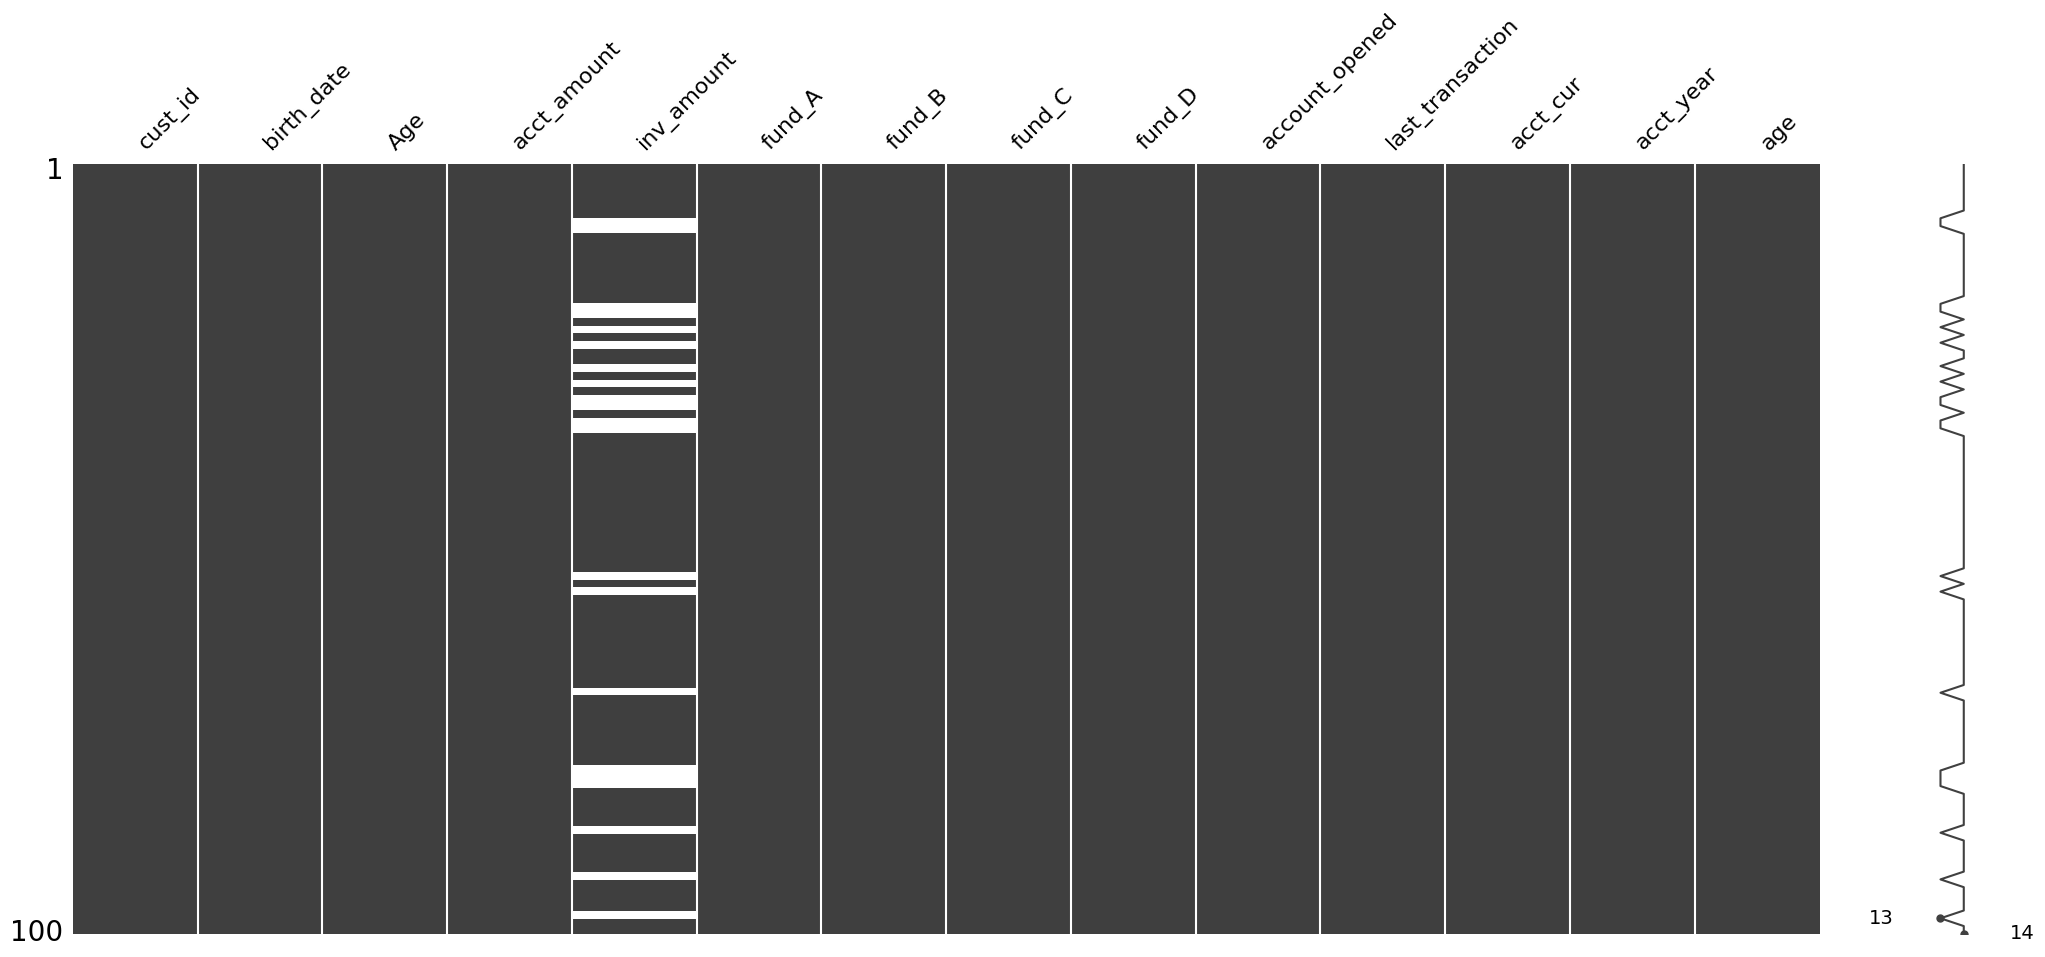

In [49]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

No missing values in my version of the dataset.

In [50]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking["inv_amount"].isna()]
investors = banking[~ banking["inv_amount"].isna()]

View the summary stats for both groups to detect the pattern in the missing data.

For efficiency, you can select only rows that are relevant to the comparison.

In [51]:
missing_investors[["Age", "acct_amount", "account_opened"]].describe()

,Age,acct_amount,account_opened
count,21.000000,21.000000,21
mean,23.619048,88214.057381,2018-03-20 11:25:42.857142784
min,18.000000,32891.310000,2017-03-04 00:00:00
25%,21.000000,74027.206000,2017-09-16 00:00:00
50%,24.000000,82728.789000,2018-03-20 00:00:00
75%,26.000000,99141.900000,2018-06-21 00:00:00
max,27.000000,250046.760000,2019-04-02 00:00:00
std,2.692140,42259.273137,NaN


In [52]:
investors[["Age", "acct_amount", "account_opened"]].describe()

,Age,acct_amount,account_opened
count,79.000000,7.900000e+01,79
mean,43.430380,3.967010e+06,2018-04-04 11:32:39.493670912
min,27.000000,1.343082e+04,2017-01-08 00:00:00
25%,35.500000,5.488646e+04,2017-11-02 12:00:00
50%,45.000000,8.985598e+04,2018-05-11 00:00:00
75%,50.500000,9.772588e+04,2018-09-13 12:00:00
max,63.000000,1.737431e+08,2019-09-02 00:00:00
std,9.874447,2.443358e+07,NaN


We can see that the `inv_amount` is missing only for younger customers.

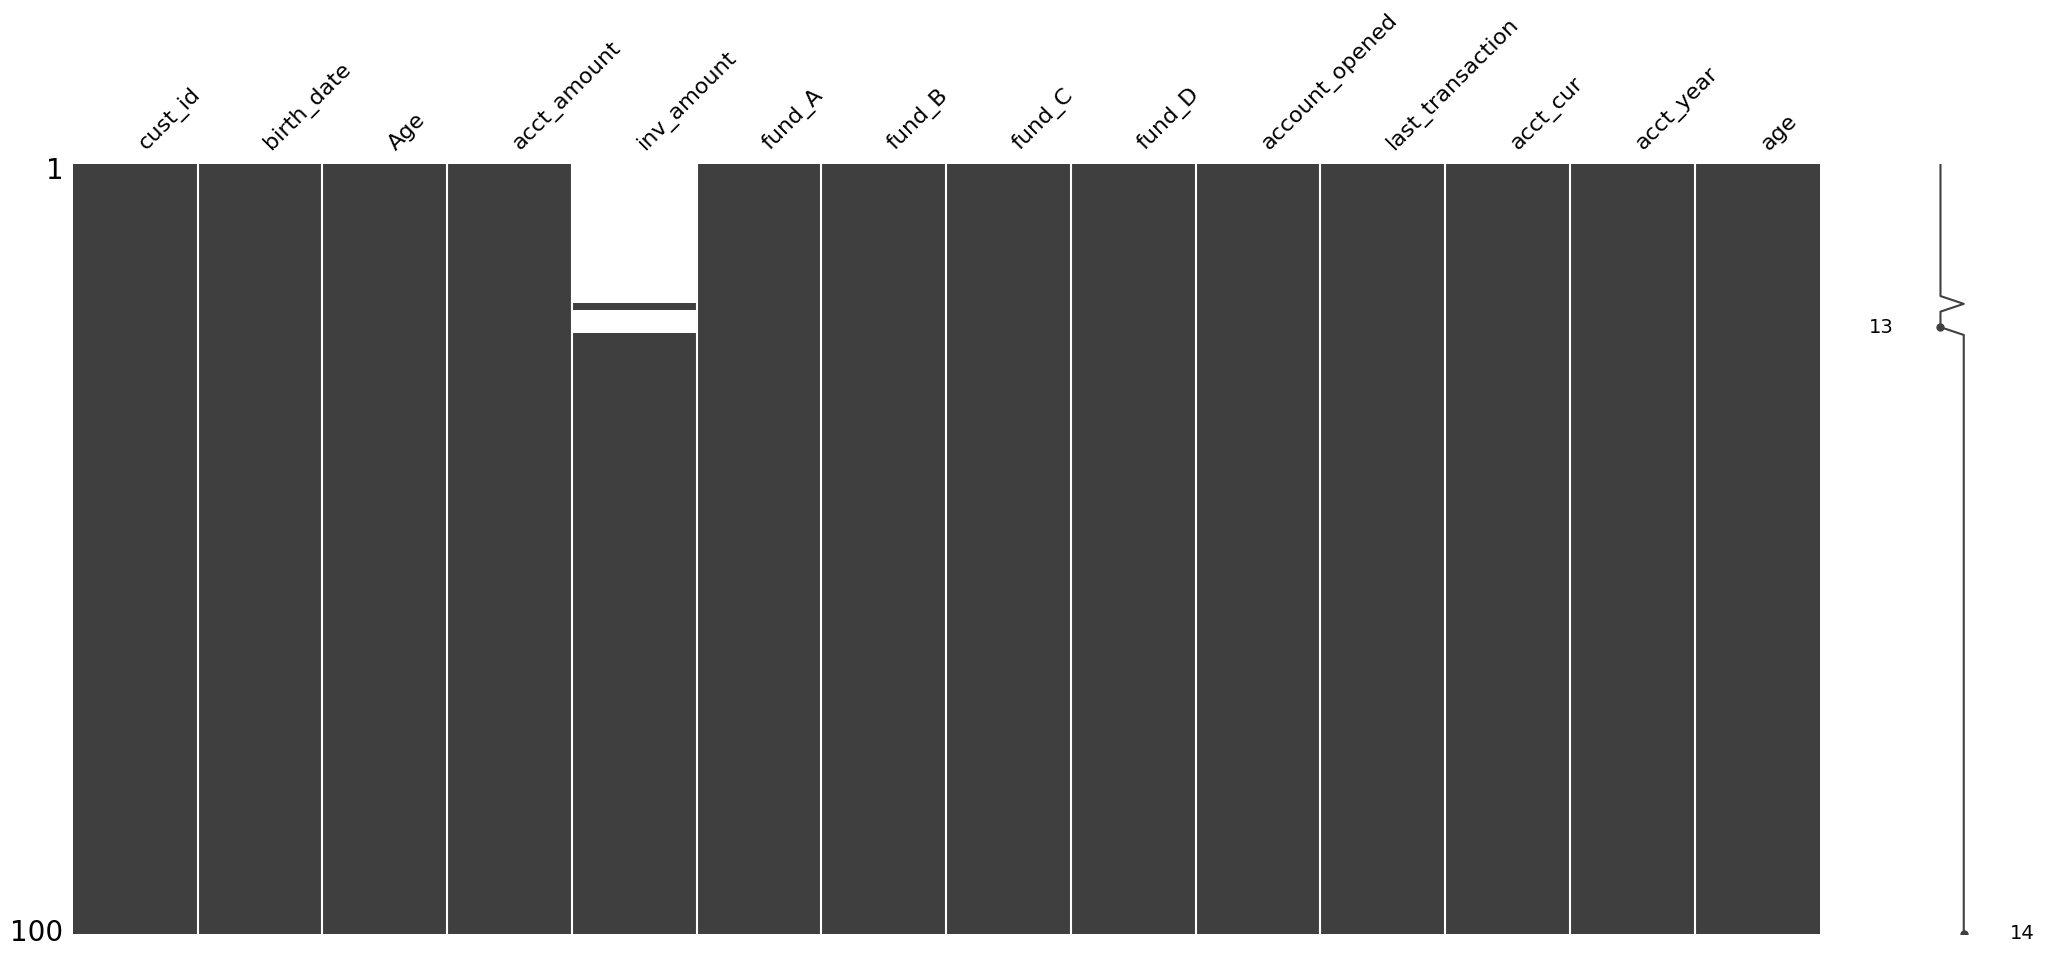

In [53]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(["Age"])
msno.matrix(banking_sorted)
plt.show()

Now we can see quite clearly that all the missing values in the `inv_amount` field are these representing younger account holders. Now that makes sense. Notice how all the white spaces for inv_amount are on top? Indeed missing values are only due to young bank account holders not investing their money! Better set it to 0 with `.fillna()`.

## Chapter 4: Record linkage

Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.